<h1 style="text-align:center; color:#DE287D; font-family: 'Segoe UI', Arial, sans-serif; font-size:2.5em; margin-top:30px; margin-bottom:10px;">
  Exploração do Dataset <span style="color:#2D9CDB;">IMDb</span><br>
  <span style="font-size:0.6em; color:#555;">O maior arquivo de filmes do mundo</span>
</h1>

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Carregando o Dataset<br>
</h1>

In [198]:
df = pd.read_csv('world_imdb_movies_top_movies_per_year.csv')

<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Informações gerais<br>
</h1>


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   title                  33600 non-null  object 
 2   link                   33600 non-null  object 
 3   year                   33600 non-null  int64  
 4   duration               33379 non-null  object 
 5   rating_mpa             25624 non-null  object 
 6   rating_imdb            33462 non-null  float64
 7   vote                   33462 non-null  float64
 8   budget                 11815 non-null  float64
 9   gross_world_wide       18222 non-null  float64
 10  gross_us_canada        17571 non-null  float64
 11  gross_opening_weekend  15523 non-null  float64
 12  director               33241 non-null  object 
 13  writer                 32024 non-null  object 
 14  star                   33127 non-null  object 
 15  ge

<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Estatísticas Descritivas<br>
</h1>

In [200]:
df.describe()

,year,rating_imdb,vote,budget,gross_world_wide,gross_us_canada,gross_opening_weekend,win,nomination,oscar
count,33600.000000,33462.000000,3.346200e+04,1.181500e+04,1.822200e+04,1.757100e+04,1.552300e+04,33600.0,33600.000000,33600.000000
mean,1992.393631,6.155158,6.637211e+04,8.454320e+07,3.814961e+07,1.808236e+07,5.110082e+06,0.0,4.850357,0.102619
std,18.957395,1.146070,6.653147e+05,2.866281e+09,1.210105e+08,4.853181e+07,1.488319e+07,0.0,17.719188,0.508687
min,1960.000000,1.100000,6.000000e+00,1.000000e+00,1.000000e+00,6.400000e+01,1.100000e+01,0.0,0.000000,0.000000
25%,1976.000000,5.500000,5.170000e+02,2.000000e+06,1.589938e+05,8.603650e+04,1.399650e+04,0.0,0.000000,0.000000
50%,1993.000000,6.300000,1.400000e+04,9.000000e+06,2.311544e+06,9.094110e+05,1.075360e+05,0.0,0.000000,0.000000
75%,2009.000000,7.000000,4.000000e+04,2.700000e+07,2.092931e+07,1.405137e+07,3.772558e+06,0.0,3.000000,0.000000
max,2024.000000,9.600000,2.600000e+07,3.000000e+11,2.923706e+09,9.366622e+08,3.571150e+08,0.0,433.000000,11.000000


<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Coletando valores nulos<br>
</h1>

In [201]:
df.isnull().sum()

id                           0
title                        0
link                         0
year                         0
duration                   221
rating_mpa                7976
rating_imdb                138
vote                       138
budget                   21785
gross_world_wide         15378
gross_us_canada          16029
gross_opening_weekend    18077
director                   359
writer                    1576
star                       473
genre                      382
country_origin             366
filming_location          6729
production_company        1378
language                   491
win                          0
nomination                   0
oscar                        0
dtype: int64

In [202]:
df.head()

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.6,33000.0,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,5.6,31000.0,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,4.9,487.0,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,6.1,23000.0,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4.0,185.0,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0,0,0


<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Distribuição geral dos dados<br>
</h1>

## PairPlot padrão 



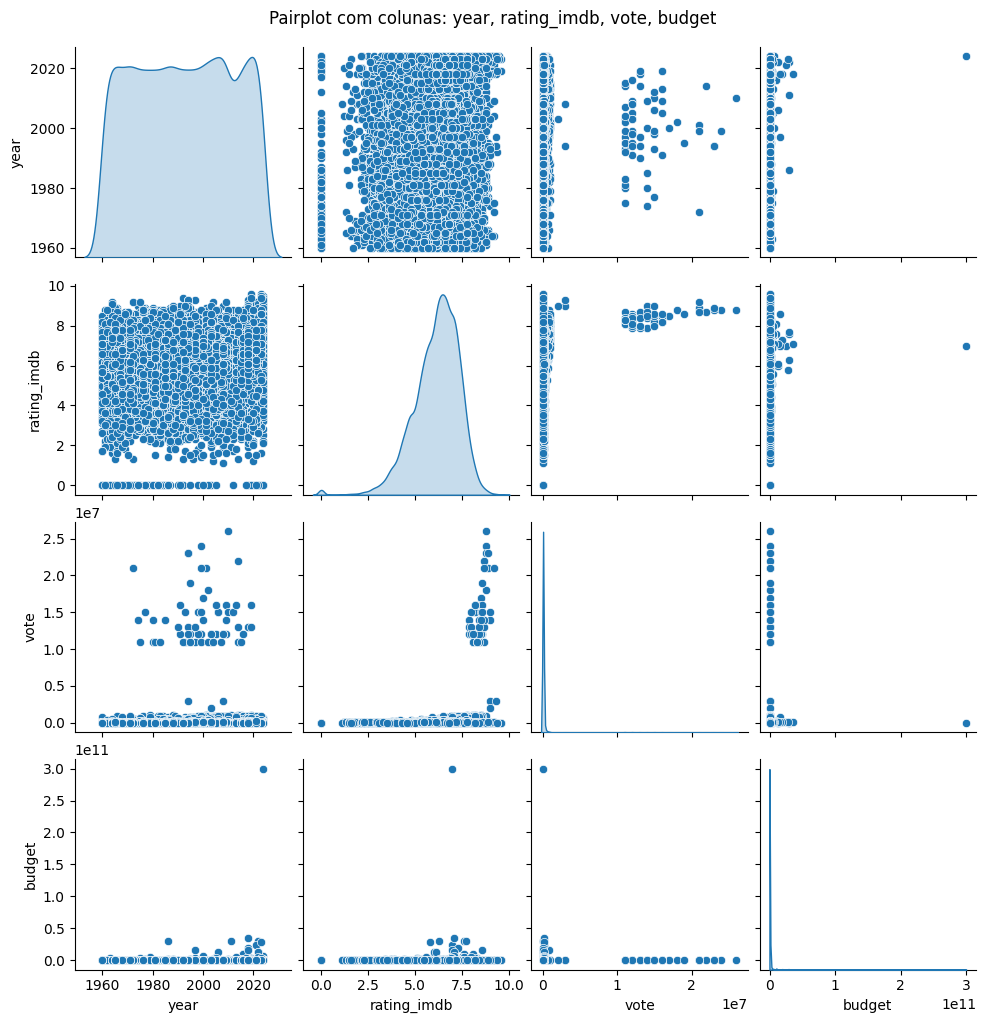

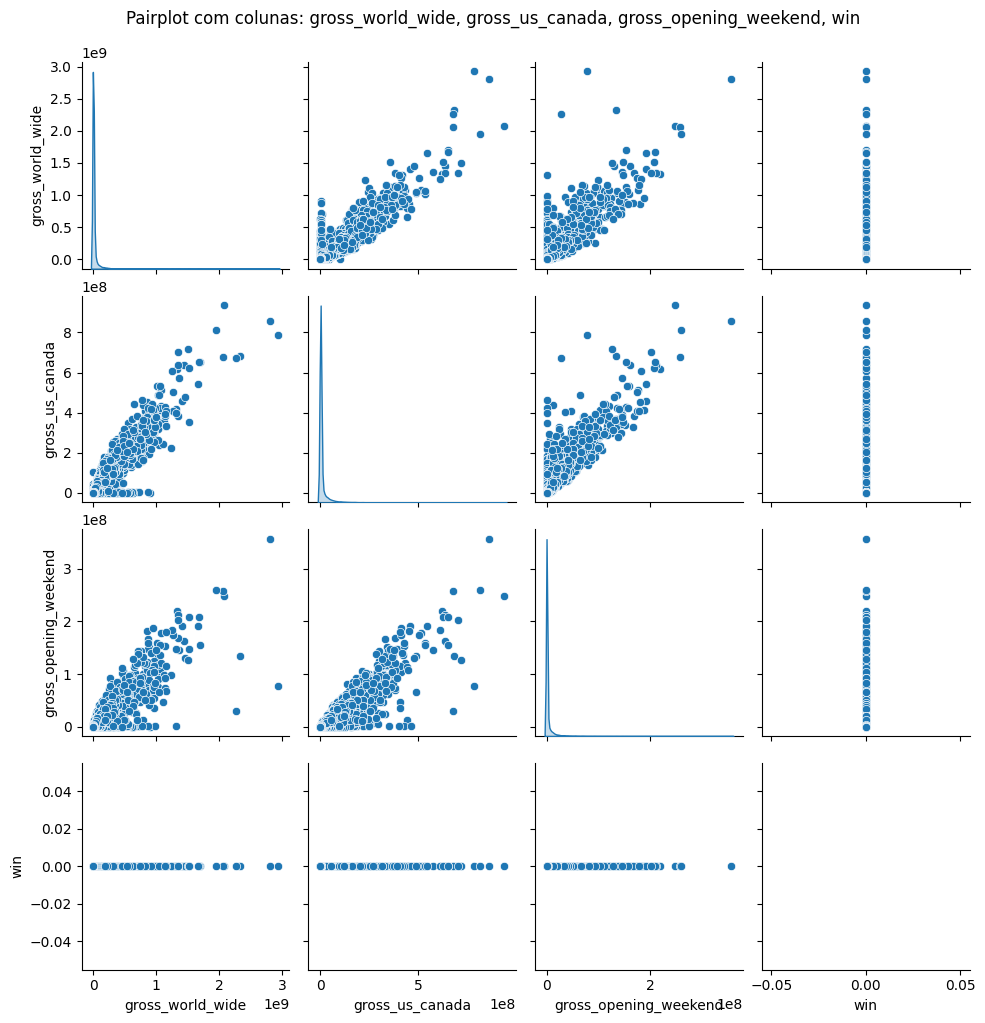

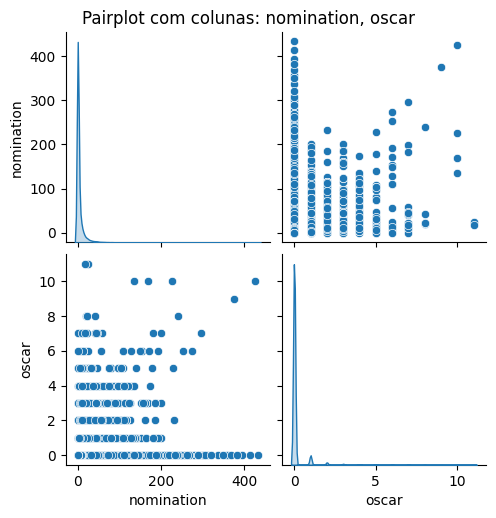

In [230]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
group_size = 4  

for i in range(0, len(numeric_cols), group_size):
    cols = numeric_cols[i:i+group_size]
    if len(cols) > 1: 
        sns.pairplot(df[cols], diag_kind='kde')
        plt.suptitle(f'Pairplot com colunas: {", ".join(cols)}', y=1.02)
        plt.show()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'rating_imdb'}>,
        <Axes: title={'center': 'vote'}>],
       [<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'gross_world_wide'}>,
        <Axes: title={'center': 'gross_us_canada'}>],
       [<Axes: title={'center': 'gross_opening_weekend'}>,
        <Axes: title={'center': 'win'}>,
        <Axes: title={'center': 'nomination'}>],
       [<Axes: title={'center': 'oscar'}>, <Axes: >, <Axes: >]],
      dtype=object)

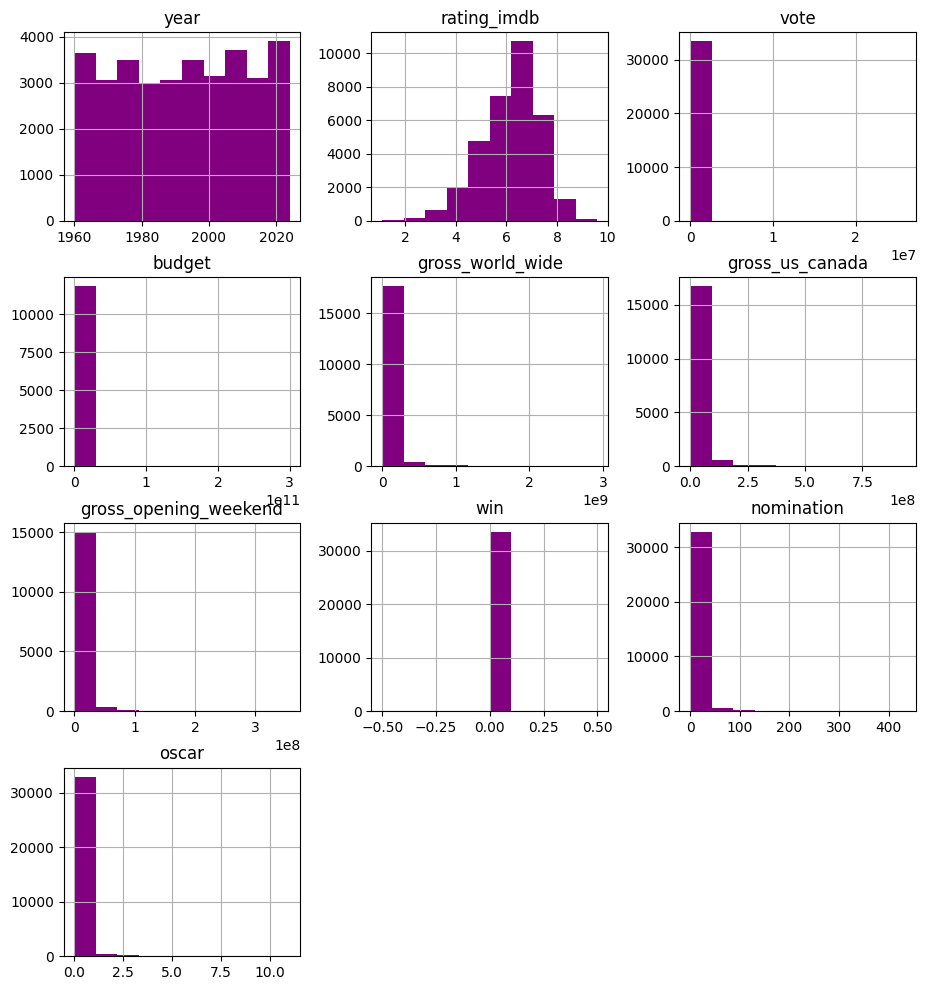

In [204]:
df.hist(figsize = (11,12), color="#800080")

<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Notamos uma grande quantidade de valores nulos neste dataset, portanto devemos substituí-los por valores válidos<br>
  <span style="color:#7B6AC6; font-weight:bold">Começaremos limpando as variáveis categóricas</span>
</h1>


In [205]:
# Removendo linhas com muitos valores nulos: +11
total_de_colunas = len(df.columns)
threshhold = total_de_colunas - 11
df = df.dropna(thresh=threshhold)

In [206]:
df.isnull().sum() # percebe-se que ainda há valores nulos

id                           0
title                        0
link                         0
year                         0
duration                   207
rating_mpa                7945
rating_imdb                111
vote                       111
budget                   21475
gross_world_wide         15091
gross_us_canada          15742
gross_opening_weekend    17782
director                    51
writer                    1266
star                       166
genre                       79
country_origin              60
filming_location          6420
production_company        1068
language                   184
win                          0
nomination                   0
oscar                        0
dtype: int64

In [207]:
valores_categóricos_nulos = [
    'duration', 
    'rating_mpa',
    'director',
    'writer',
    'star',
    'genre',
    'country_origin',
    'filming_location',
    'production_company',
    'language'
]
# Preenchendo valores nulos em colunas categóricas com 'Unknown'
for col in valores_categóricos_nulos:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
        print(f"Coluna '{col}' preenchida com 'Unknown' para valores préviamente nulos")
    else:
        print(f"A coluna '{col}' não existe no DataFrame.")
df.isnull().sum()


Coluna 'duration' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'rating_mpa' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'director' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'writer' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'star' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'genre' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'country_origin' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'filming_location' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'production_company' preenchida com 'Unknown' para valores préviamente nulos
Coluna 'language' preenchida com 'Unknown' para valores préviamente nulos


id                           0
title                        0
link                         0
year                         0
duration                     0
rating_mpa                   0
rating_imdb                111
vote                       111
budget                   21475
gross_world_wide         15091
gross_us_canada          15742
gross_opening_weekend    17782
director                     0
writer                       0
star                         0
genre                        0
country_origin               0
filming_location             0
production_company           0
language                     0
win                          0
nomination                   0
oscar                        0
dtype: int64

<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Agora limparemos as variáveis discretas<br>
</h1>

In [208]:

numeric_null_values = [
    'rating_imdb',
    'vote',
    'budget',
    'gross_world_wide',
    'gross_us_canada',
    'gross_opening_weekend'
]

for col in numeric_null_values:
    if col in df.columns:
        df[col] = df[col].fillna(0)
        print(f"Coluna '{col}' preenchida com 0 para valores préviamente nulos")
    else:
        print(f"A coluna '{col}' não existe no DataFrame.")

Coluna 'rating_imdb' preenchida com 0 para valores préviamente nulos
Coluna 'vote' preenchida com 0 para valores préviamente nulos
Coluna 'budget' preenchida com 0 para valores préviamente nulos
Coluna 'gross_world_wide' preenchida com 0 para valores préviamente nulos
Coluna 'gross_us_canada' preenchida com 0 para valores préviamente nulos
Coluna 'gross_opening_weekend' preenchida com 0 para valores préviamente nulos


In [209]:
df.isnull().sum()

id                       0
title                    0
link                     0
year                     0
duration                 0
rating_mpa               0
rating_imdb              0
vote                     0
budget                   0
gross_world_wide         0
gross_us_canada          0
gross_opening_weekend    0
director                 0
writer                   0
star                     0
genre                    0
country_origin           0
filming_location         0
production_company       0
language                 0
win                      0
nomination               0
oscar                    0
dtype: int64

<h1 style="text-align:center; color:#fffff; font-family: 'Segoe UI', Arial, sans-serif; font-size:1.5em; margin-top:30px; margin-bottom:10px;">
  Agora que não temos mais valores nulos, podemos começar as análises<br>
</h1>

# Visão Geral e Popularidade 
## 1. Quais são os 10 filmes com a maior gross_world_wide (arrecadação mundial)? 

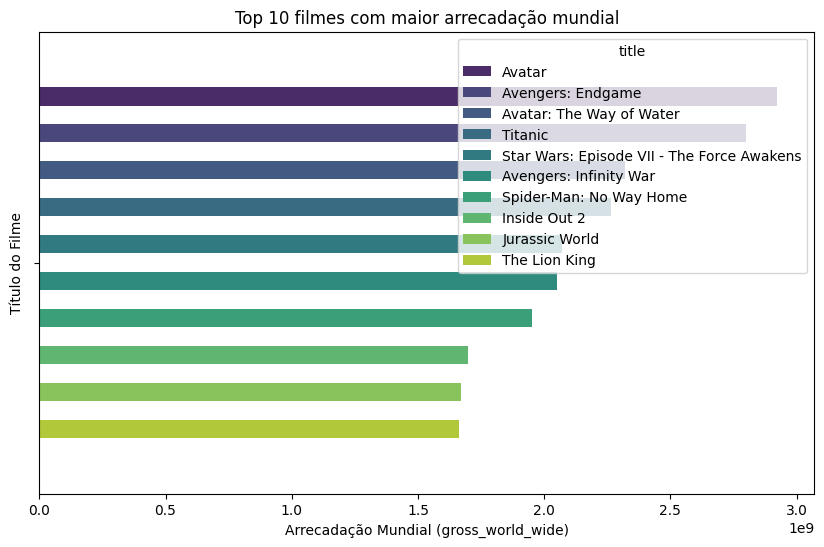

In [210]:
top_gross= df.nlargest(10, 'gross_world_wide')
plt.figure(figsize=(10, 6))

sns.barplot(data=top_gross, x='gross_world_wide', hue='title', palette='viridis', gap=0.5)
plt.title('Top 10 filmes com maior arrecadação mundial')
plt.xlabel('Arrecadação Mundial (gross_world_wide)')
plt.ylabel('Título do Filme')
plt.show()

# 2. Quais são os 10 filmes com o maior rating_imdb (nota IMDb média)?

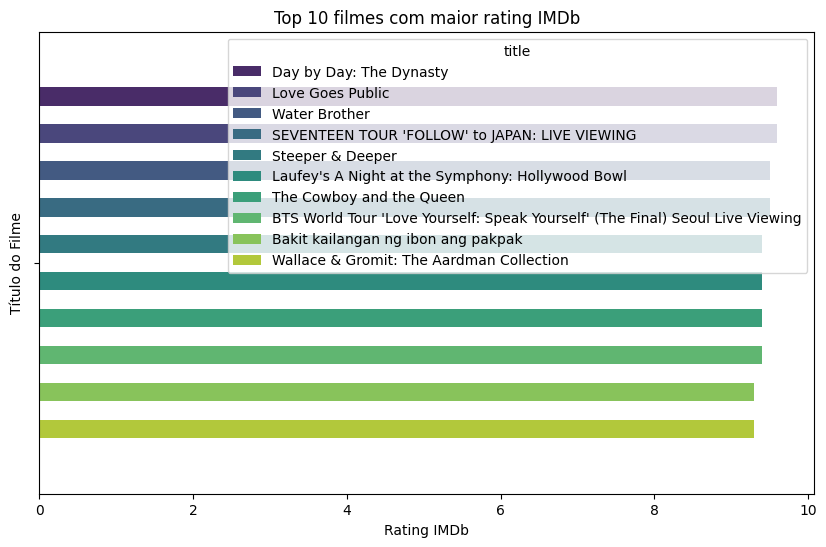

Text(0.5, 1.0, 'Quantidade de votos - Baixa')

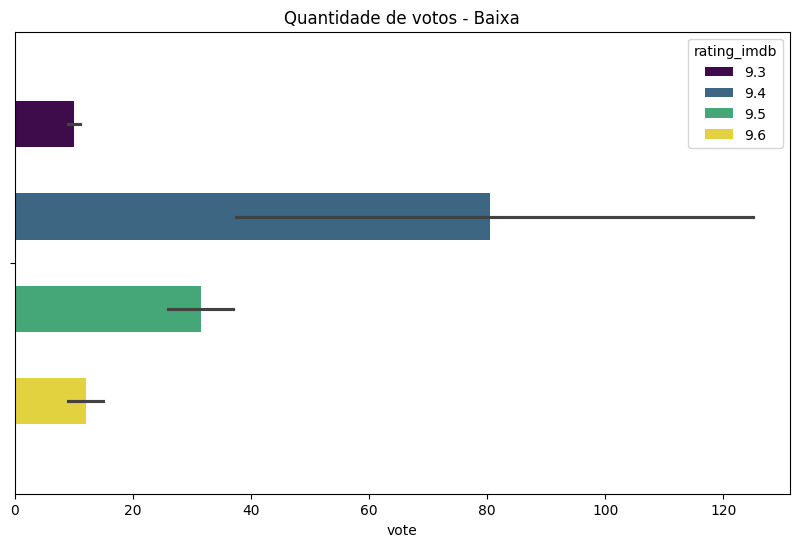

In [211]:
top_rating = df.nlargest(10, 'rating_imdb')
plt.figure(figsize=(10, 6))

sns.barplot(data=top_rating, x='rating_imdb', hue='title', palette='viridis', gap=0.5)
plt.title('Top 10 filmes com maior rating IMDb')
plt.xlabel('Rating IMDb')
plt.ylabel('Título do Filme')
plt.show()  
plt.figure(figsize=(10, 6))

sns.barplot(data=top_rating, x='vote', hue='rating_imdb', palette='viridis', gap=0.5)
plt.title('Quantidade de votos - Baixa')

# Intepretação
- Filmes pouco conhecidos e pouco votados, mas com alta avaliação. **Pode ser um viés.**

# Comparando quantidade de voto baixa e depois avaliação alta X Avaliação alta e quantidade de  altíssima

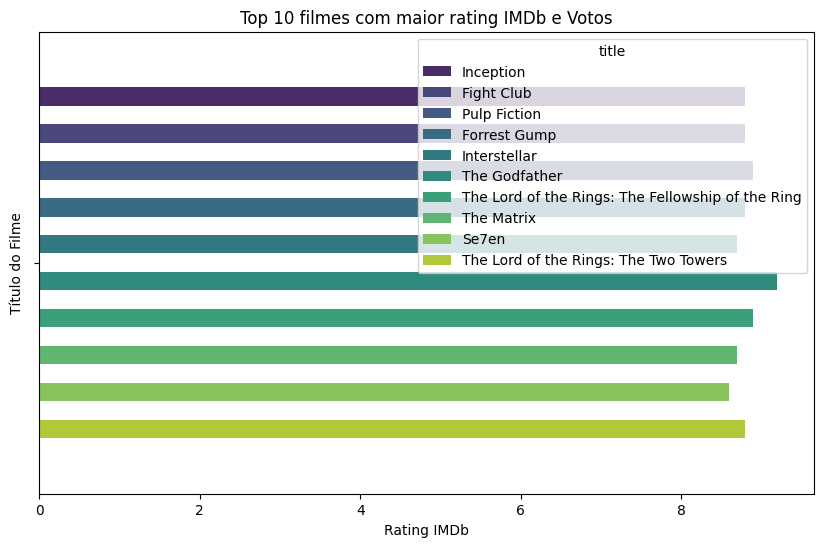

Text(0.5, 1.0, 'Quantidade de pessoas que votaram - alta')

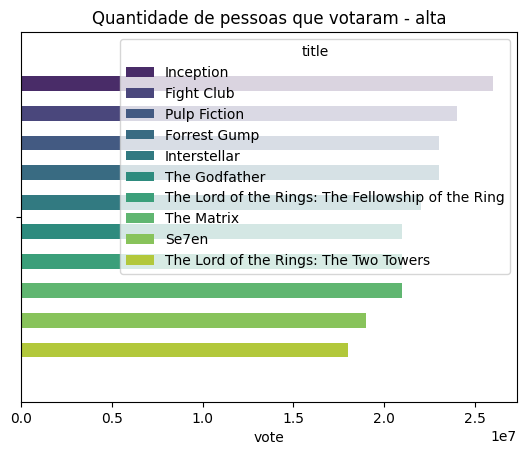

In [212]:
top_rating = df.nlargest(10, ['vote', 'rating_imdb', 'gross_world_wide'])
plt.figure(figsize=(10, 6))

sns.barplot(data=top_rating, x='rating_imdb', hue='title', palette='viridis', gap=0.5)
plt.title('Top 10 filmes com maior rating IMDb e Votos')
plt.xlabel('Rating IMDb')
plt.ylabel('Título do Filme')
plt.show()  
sns.barplot(data=top_rating, x='vote', hue='title', palette='viridis', gap=0.5)
plt.title('Quantidade de pessoas que votaram - alta')


# Interpretação
- Filmes com **as maiores** avaliação em geral são pouco votados e pouco conhecidos.

- Filmes altamente conhecidos tendem a ter uma votação muito maior e não **necessariamente terá a maior avaliação, mas poderá manter uma avaliação alta.**

# 3. Existe uma relação entre o budget (orçamento) de um filme e sua gross_world_wide? Filmes mais caros tendem a arrecadar mais?

Text(0.5, 1.0, 'Correlação entre Orçamento e Arrecadação - 0.01')

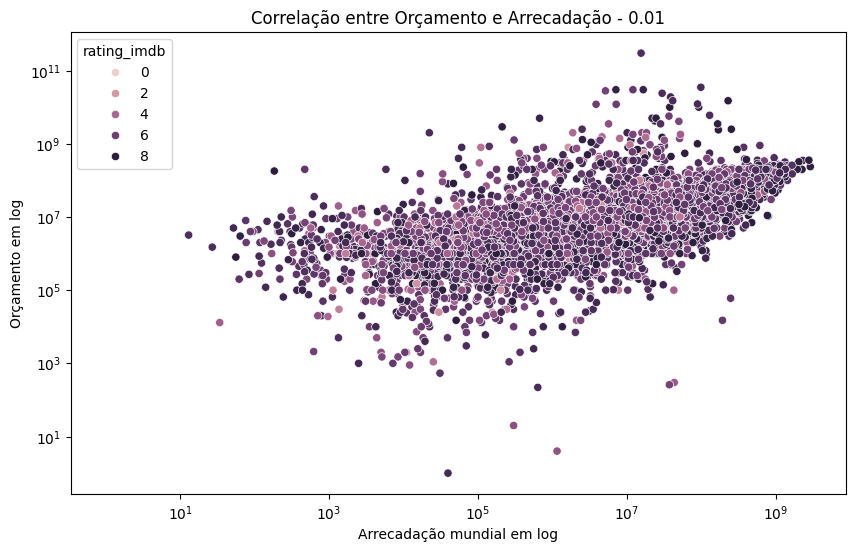

In [213]:
correlation = df['budget'].corr(df['gross_world_wide'])
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='gross_world_wide', y='budget', hue='rating_imdb', hue_norm=(0,8))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Arrecadação mundial em log")
plt.ylabel("Orçamento em log")
plt.title(f"Correlação entre Orçamento e Arrecadação - {correlation:.2f}")


# Interpretação
- **Filmes com avaliação igual** tendem a ter arrecadado uma quantidade parecida de recurso.

- Não necessariamente filmes com alta avaliação **arrecadaram mais ou utilizaram um orçamento maior**.

- Há a presença de outliers, fiilmes esses que **arrecadam muito e gastam pouco**, e filmes que arrecadam pouco e gastam muito.

- Esse gráfico indica que há outros fatores que **influenciam a arrecadação além do orçamento**. Simplemente aumentar o orçamento não garante um aumento na arrecadação.

# 4. Como a quantidade de vote (votos) se distribui? A maioria dos filmes tem poucos votos, ou há muitos com milhões de votos?

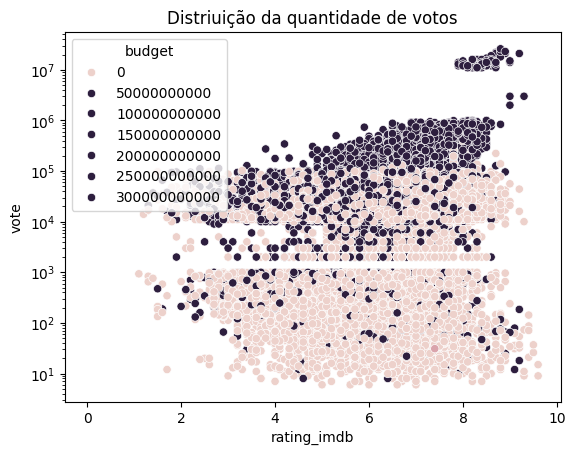

<Figure size 1000x600 with 0 Axes>

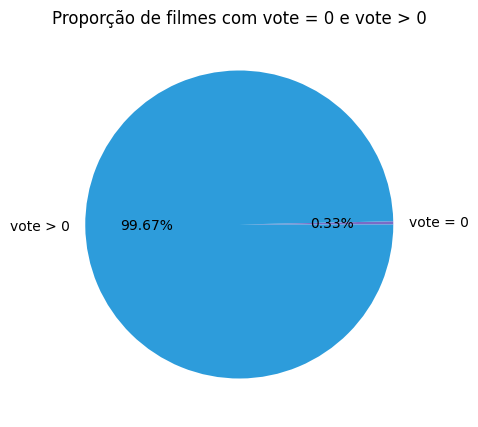

In [214]:
sns.scatterplot(data=df, x='rating_imdb', y = 'vote',  hue='budget' , hue_norm=(0,5))
plt.title("Distriuição da quantidade de votos")
plt.yscale('log')
qtd_votos_zero = (df['vote'] == 0).sum()
qtd_votos_nao__zero = (df['vote'] != 0).sum()

labels = ['vote = 0', 'vote > 0']
sizes = [(df['vote'] == 0).sum(), (df['vote'] != 0).sum()]
colors = ['#7B6AC6', '#2D9CDB']
plt.figure(figsize=(10, 6))

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title('Proporção de filmes com vote = 0 e vote > 0')
plt.show()

# Interpretação
- **A maioria** dos filmes tiveram avaliação com votos. **Somente 0.3%** dos filmes não foram avaliados

- Valores de voto **igual a zero** foram imputados com 0, pois não havia nenhum  registro sobre seu voto. Porém, eles representam uma minoria insignificante

# 2. Diretores, Escritores e Estrelas 
## 1. Quem são os 5 diretores mais prolíficos no dataset (aqueles com mais filmes)? Qual a média de rating_imdb dos filmes desses diretores?

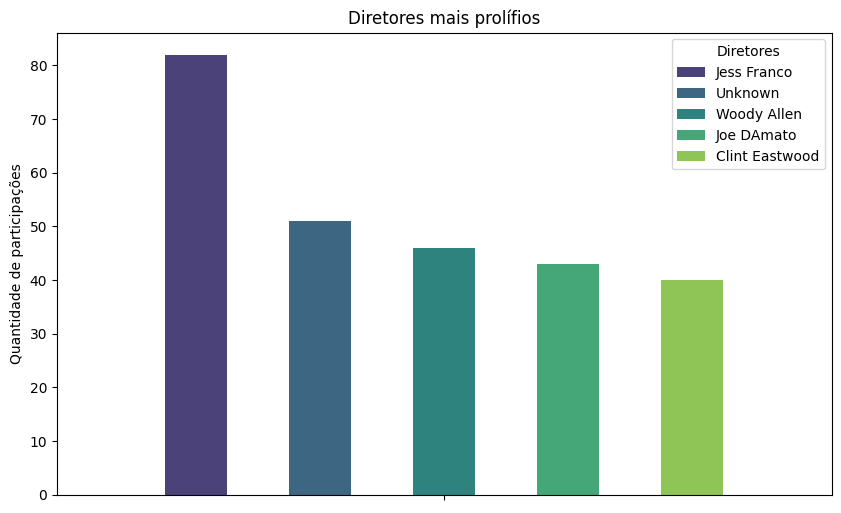

In [269]:
directors = df['director'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
dx = directors.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=dx, hue='director', y='count', fill=True, palette='viridis', gap=0.5)
plt.ylabel("Quantidade de participações")
plt.legend(title="Diretores")
plt.title("Diretores mais prolífios", fontsize=12)
plt.show()

## 2. Qual diretor tem a maior média de gross_world_wide (arrecadação mundial média) por filme (considerando apenas diretores com um número mínimo de filmes, digamos, 5 ou 10)?

In [216]:
# media do gross worldwide 
gross_mean = df['gross_world_wide'].mean() # average gross 

top_gross = df.nlargest(100, 'gross_world_wide')[['title', 'gross_world_wide', 'director']]

directors = df['director'].value_counts().reset_index(name='count')

directors_10_plus = directors[directors['count'] > 5].rename(columns={'index': 'director'})

top_gross_with_director = pd.merge(top_gross, directors_10_plus, on='director', how='inner')

z = top_gross_with_director.head(10)
z

# how='inner' → só filmes com diretores > 10 filmes
# how='left' + fillna(0) → mantém todos, mas mostra 0 para diretores com <= 10 filmes

,title,gross_world_wide,director,count
0,Avatar,2.923706e+09,James Cameron,9
1,Avengers: Endgame,2.799439e+09,"Anthony Russo, Joe Russo",7
2,Avatar: The Way of Water,2.320250e+09,James Cameron,9
3,Titanic,2.264751e+09,James Cameron,9
4,Star Wars: Episode VII - The Force Awakens,2.071310e+09,JJ Abrams,6
5,Avengers: Infinity War,2.052415e+09,"Anthony Russo, Joe Russo",7
6,Spider-Man: No Way Home,1.952724e+09,Jon Watts,6
7,The Lion King,1.662021e+09,Jon Favreau,9
8,Furious 7,1.515342e+09,James Wan,11
9,Harry Potter and the Deathly Hallows: Part 2,1.342500e+09,David Yates,9


Text(0.5, 1.0, 'Diretores com maior arrecadação global')

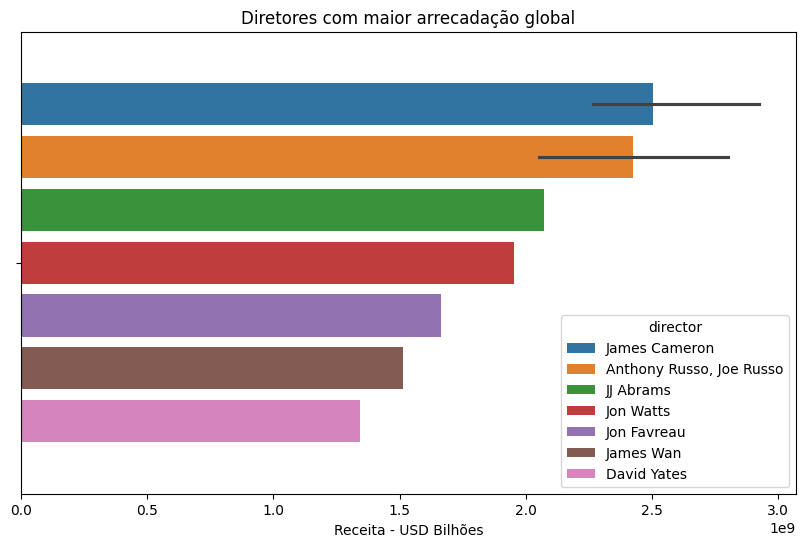

In [217]:
plt.figure(figsize=(10, 6))
sns.barplot(data=z, x='gross_world_wide',hue ='director', orient='y', gap=0.2)
plt.xlabel("Receita - USD Bilhões")
plt.title("Diretores com maior arrecadação global")

## Gêneros que mais faturam?

In [218]:
grouped = df.groupby(['genre']).agg({'gross_world_wide': 'mean'})
top_genre = grouped.nlargest(5, 'gross_world_wide').reset_index()
top_genre

,genre,gross_world_wide
0,"Adventure Epic, Fantasy Epic, SciFi Epic, Acti...",2.923706e+09
1,"Space SciFi, Superhero, Time Travel, Tragedy, ...",2.799439e+09
2,"Action Epic, Adventure Epic, SciFi Epic, Sea A...",2.320250e+09
3,"Disaster, Epic, Period Drama, Romantic Epic, T...",2.264751e+09
4,"Action Epic, Adventure Epic, Globetrotting Adv...",2.071310e+09


# Graficamente os 5 gêneros com maior receita

/tmp/ipykernel_30643/1560003464.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cnt, x='count',y='genre', orient='h', palette='viridis', gap=0.2)


Text(0, 0.5, 'Gêneros')

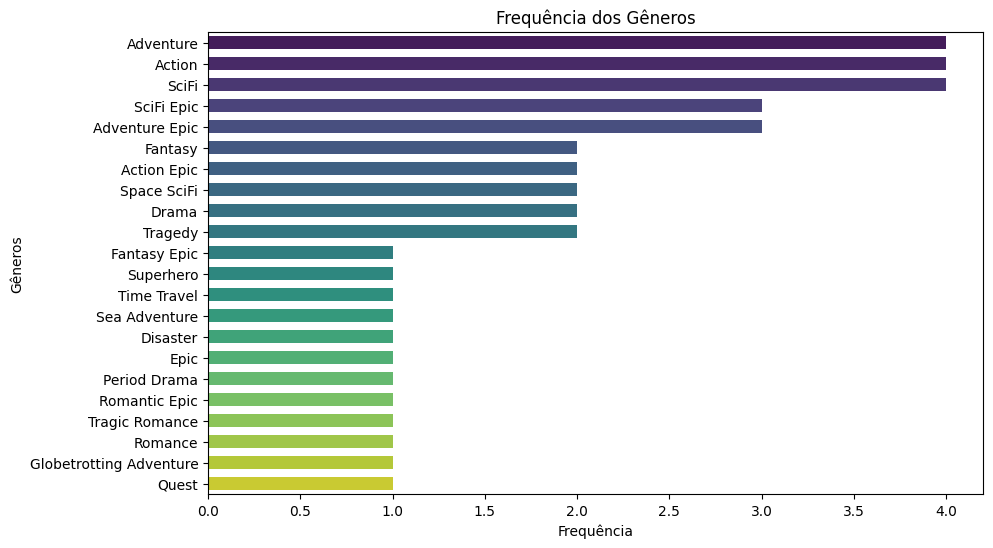

In [219]:
x = top_genre['genre']
palavras = []
# coloca as palavras em uma lista
for str in x:
    words = [w.strip() for w in re.split(r'[,\[\]]', str) if w.strip()]
    palavras.extend(words)

z = pd.Series(palavras)
cnt = z.value_counts().reset_index()
cnt = cnt.rename(columns={'index': 'genre'})
plt.figure(figsize=(10, 6))

sns.barplot(data=cnt, x='count',y='genre', orient='h', palette='viridis', gap=0.2)
plt.xlabel('Frequência')
plt.title('Frequência dos Gêneros',fontsize=12)
plt.ylabel('Gêneros')

# Interpretação
- Gêneros de **Aventura, Ação e Ficção Científica** englobam os filmes que mais arrecadaram mundialmente

- Por conta de um filme **ter mais de um gênero**, necessitamos separar a cadeia de gêneros formadas por um filme e contar qual gênero mais aparece nos filmes com receita maior. Nesse caso, tivemos o resultado acima.

# 4. Aspectos de Produção
## Quais são as 5 principais production_company (companhias de produção) em termos de número de filmes? Elas também são as que mais arrecadam?

/tmp/ipykernel_30643/1894691692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='count', y='production_company', orient='y', palette='viridis')


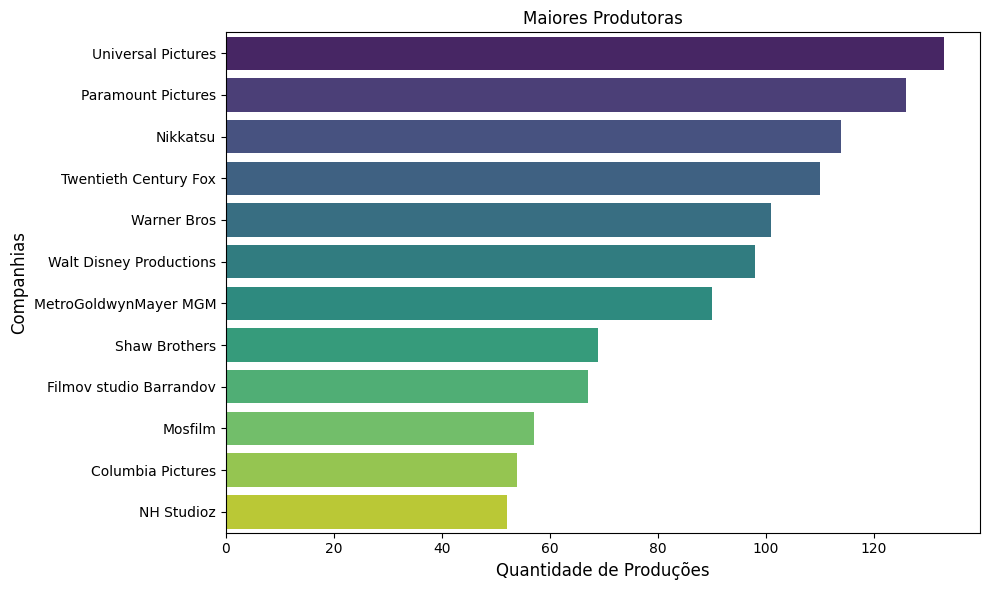

In [221]:
top_companies = df['production_company'].value_counts().reset_index(name='count')
top_companies = top_companies[(top_companies['production_company'] != 'Unknown') & (top_companies['count'] > 50)]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies, x='count', y='production_company', orient='y', palette='viridis')
plt.ylabel('Companhias', fontsize=12)
plt.xlabel("Quantidade de Produções", fontsize=12)
plt.title("Maiores Produtoras", fontsize=12)
plt.tight_layout()


# Interpretação
- **Rank das Top 10 empresas que mais produzem filmes no mundo.**

/tmp/ipykernel_30643/3137226046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='count', y='production_company', orient='y', palette='viridis')


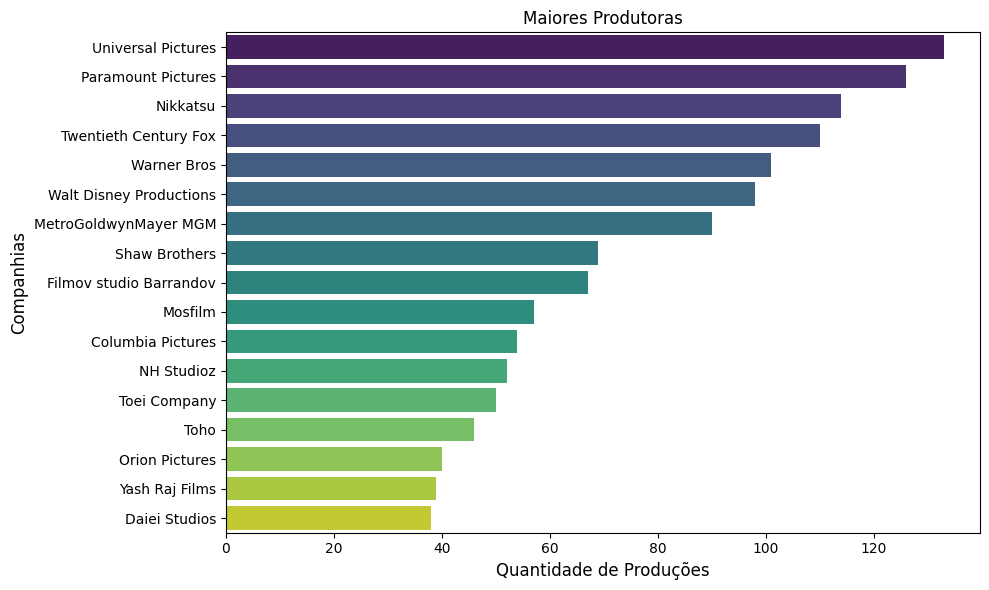

In [266]:
top_companies = df['production_company'].value_counts().reset_index(name='count')
top_companies = top_companies[(top_companies['production_company'] != 'Unknown') & (top_companies['count'] > 37)]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies, x='count', y='production_company', orient='y', palette='viridis')
plt.ylabel('Companhias', fontsize=12)
plt.xlabel("Quantidade de Produções", fontsize=12)
plt.title("Maiores Produtoras", fontsize=12)
plt.tight_layout()


# Interpretação
- **Rank das Top 15 empresas que mais produzem filmes no mundo.**

### Top filmes com suas respectivas empresas que os produziram

In [261]:
top_gross_productions = df.nlargest(100, 'gross_world_wide')[['title', 'gross_world_wide', 'director', 'production_company']]
top10 = set(top_companies.head(10)['production_company'])
def is_in_top(str):
    companies = [c.strip() for c in re.split(r'[,\[\]]', str) if c.strip()]
    return any(c in top10 for c in companies)
    
top_gross_productions['top_company_made_it'] = top_gross_productions['production_company'].apply(is_in_top)
# display(top_gross_productions[top_gross_productions['top_company_made_it']])

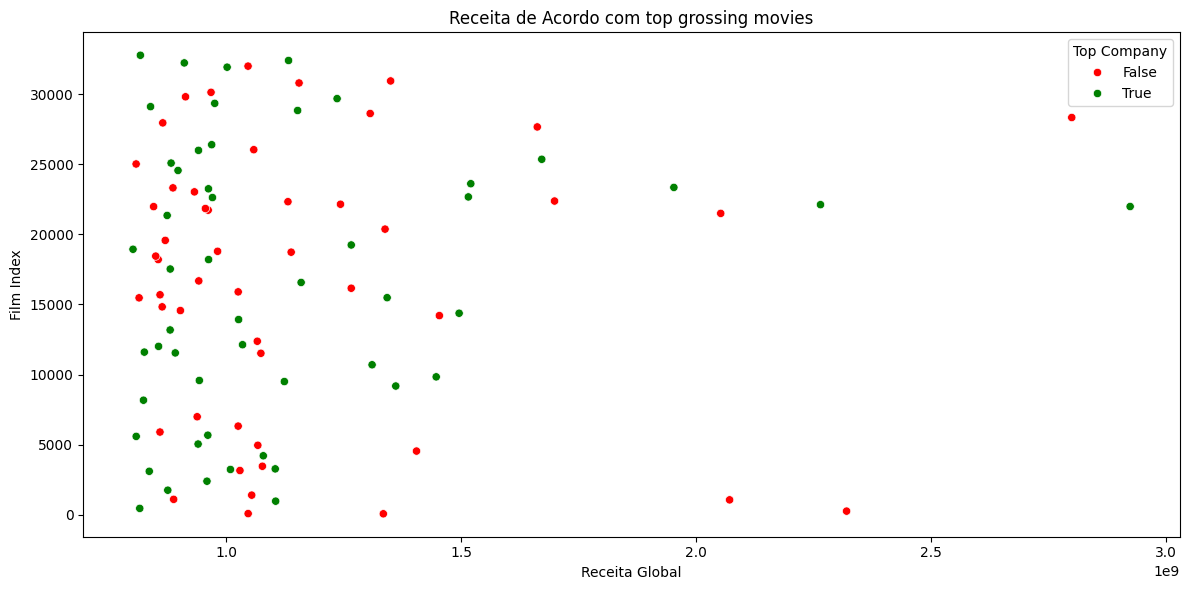

In [259]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=top_gross_productions,
    x='gross_world_wide',
    y=top_gross_productions.index,
    hue='top_company_made_it',
    palette={True: 'green', False: 'red'},
    legend='full'
)
plt.xlabel('Receita Global')
plt.ylabel('Film Index')
plt.title('Receita de Acordo com top grossing movies')
plt.legend(title='Top Company')
plt.tight_layout()
plt.show()

In [260]:
top_gross_productions['top_company_made_it'].value_counts()

top_company_made_it
True     51
False    49
Name: count, dtype: int64

# Interpretação
- Encontramos que nesse caso, as 10 maiores empresas fazem apenas 42% de 100 dos filmes que mais arrecadaram receitas. Os outros 59% é feito por **empresas que não faz parte do grupo das 10 maiores**

- **As outras empresas fazem parte das 15 maiores empresas. Somente nesse caso, teríamos que as maiores empresas fazem a maior parte dos filmes que mais arrecadam**


# Qual country_origin (país de origem) produz mais filmes? Qual país tem a maior média de rating_imdb para seus filmes?



/tmp/ipykernel_30643/1642399051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='count', y='country_origin', orient='y', palette='viridis')


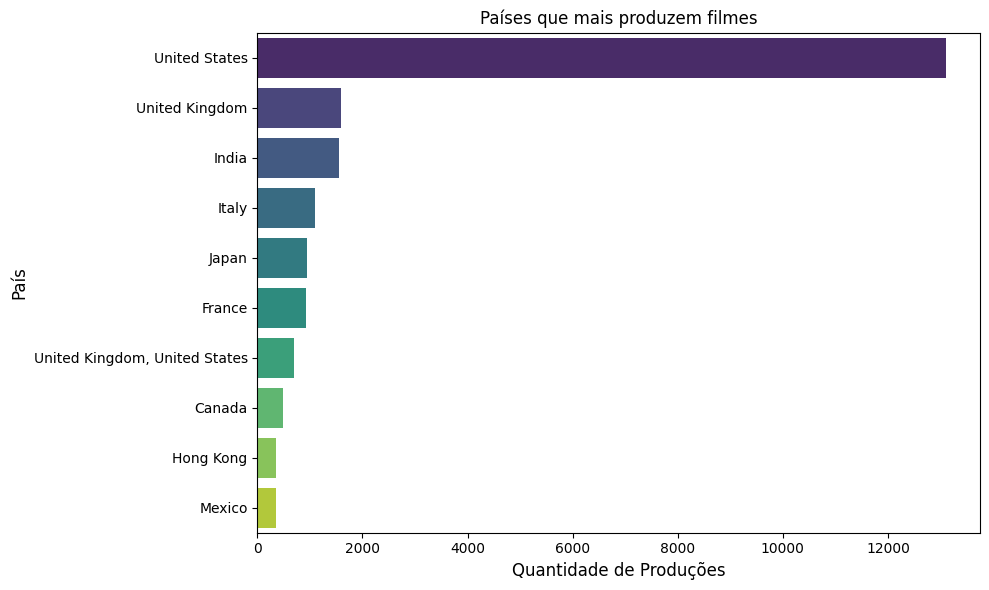

In [225]:
top_countries = df['country_origin'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
top_countries = top_countries.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='count', y='country_origin', orient='y', palette='viridis')
plt.ylabel('País', fontsize=12)
plt.xlabel("Quantidade de Produções", fontsize=12)
plt.title("Países que mais produzem filmes", fontsize=12)
plt.tight_layout()


/tmp/ipykernel_30643/3342494120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=z, x='rating_imdb', y='country_origin', orient='y', palette='viridis')


Text(0.5, 1.0, 'Países com maior avaliação')

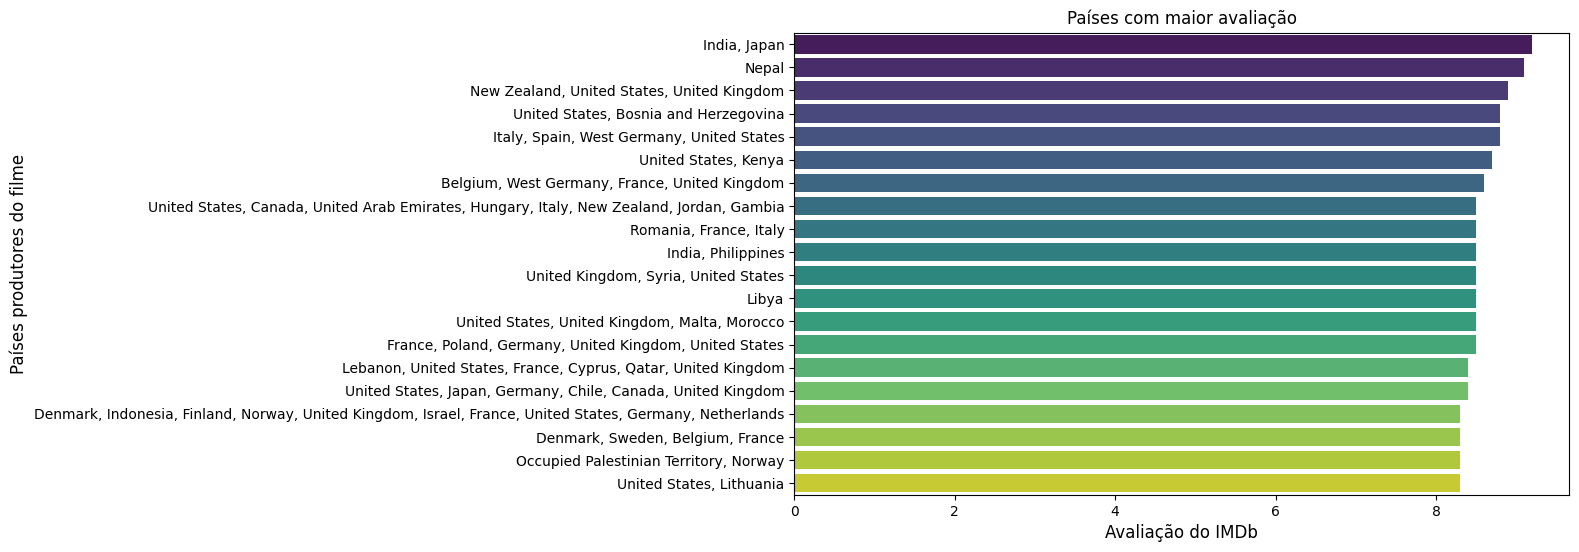

In [226]:
country_rating_mean = df.groupby('country_origin')['rating_imdb'].mean().reset_index().sort_values(by='rating_imdb', ascending=False)
z = country_rating_mean.head(20)  # Top 10 countries by average rating
plt.figure(figsize=(10, 6))

sns.barplot(data=z, x='rating_imdb', y='country_origin', orient='y', palette='viridis')
plt.xlabel('Avaliação do IMDb',fontsize=12)
plt.ylabel('Países produtores do filme', fontsize=12)
plt.title('Países com maior avaliação', fontsize=12)

# Interpretação
**Nesse gráfico, analisamos os países com filmes de maior avaliação no IMDd**

## 10 países com mais filmes, ordenados pela maior média de avaliação IMDb.

/tmp/ipykernel_30643/3596087327.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=z, x='avg_rating', y='country_origin',  orient='y', palette='viridis')


<Axes: xlabel='avg_rating', ylabel='country_origin'>

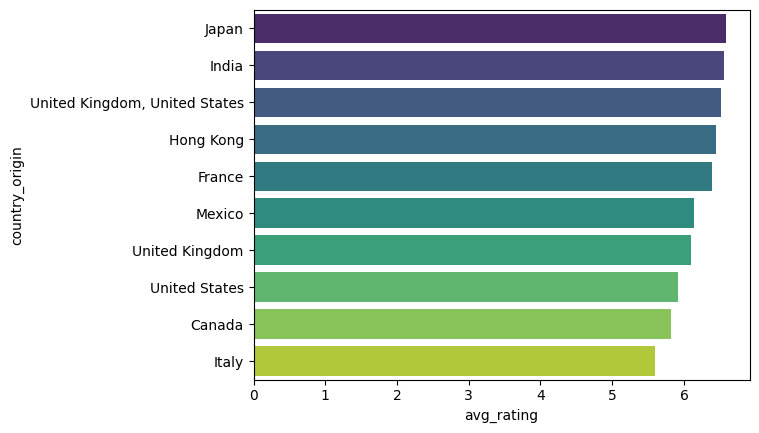

In [254]:
top_countries = df['country_origin'].value_counts().reset_index()
top_countries.columns = ['country_origin', 'film_count']
top_countries = top_countries.set_index('country_origin')

country_rating_mean = df.groupby('country_origin')['rating_imdb'].mean()
country_rating_mean.name = 'avg_rating'

top_countries = top_countries.join(country_rating_mean).reset_index() # juntamos com base no índice country_origin 

z = top_countries.head(10).sort_values(by='avg_rating', ascending=False)
sns.barplot(data=z, x='avg_rating', y='country_origin',  orient='y', palette='viridis')



# Interpretação
**Nesse gráfico, nós rankeamos quais são os 10 países que mais produzem filmes**


# A language (idioma) principal do filme afeta a gross_world_wide ou o rating_imdb?

/tmp/ipykernel_30643/1736715334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30_lang, x='language', y='gross_world_wide', palette='viridis')


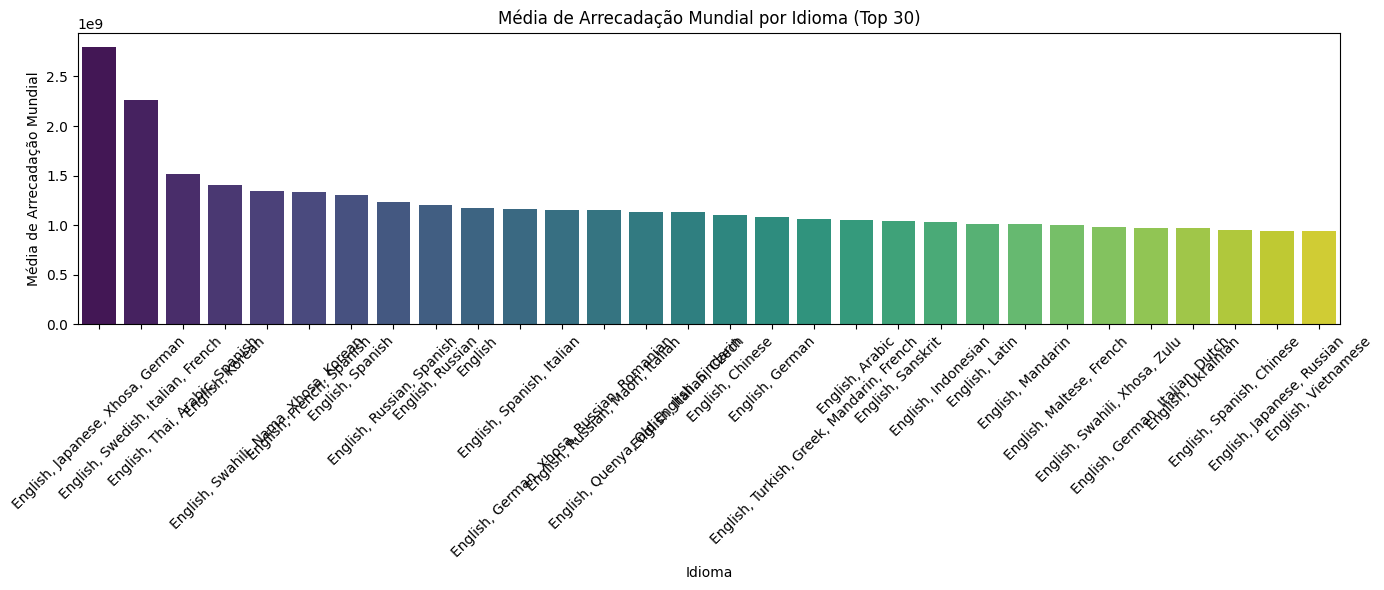

In [228]:

top_gross_productions = df.nlargest(100, ['gross_world_wide', 'rating_imdb'])[['title', 'language','gross_world_wide', 'director', 'production_company']]
mean_gross_by_lang = top_gross_productions.groupby('language')['gross_world_wide'].mean().reset_index()
mean_gross_by_lang = mean_gross_by_lang.sort_values(by='gross_world_wide', ascending=False) # ordenando

top30_lang = mean_gross_by_lang.head(30)

plt.figure(figsize=(14, 6))
sns.barplot(data=top30_lang, x='language', y='gross_world_wide', palette='viridis')
plt.xticks(rotation=45)
plt.title('Média de Arrecadação Mundial por Idioma (Top 30)')
plt.xlabel('Idioma')
plt.ylabel('Média de Arrecadação Mundial')
plt.tight_layout()
plt.show()

## Interpretações
**Nesse gráfico, nós analisamos com que o idioma pode de alguma forma afetar a arrecadação total de um filme**
- **Outlies nos EUA**
    - É possível observar os filmes com maior receita ao toda possuem a língua original i**nglês**. As demais barras do gráfico são combinações de inglês com outros idiomas, como por exemplo vietnamita.

# Matriz de correlação das variáveis númericas

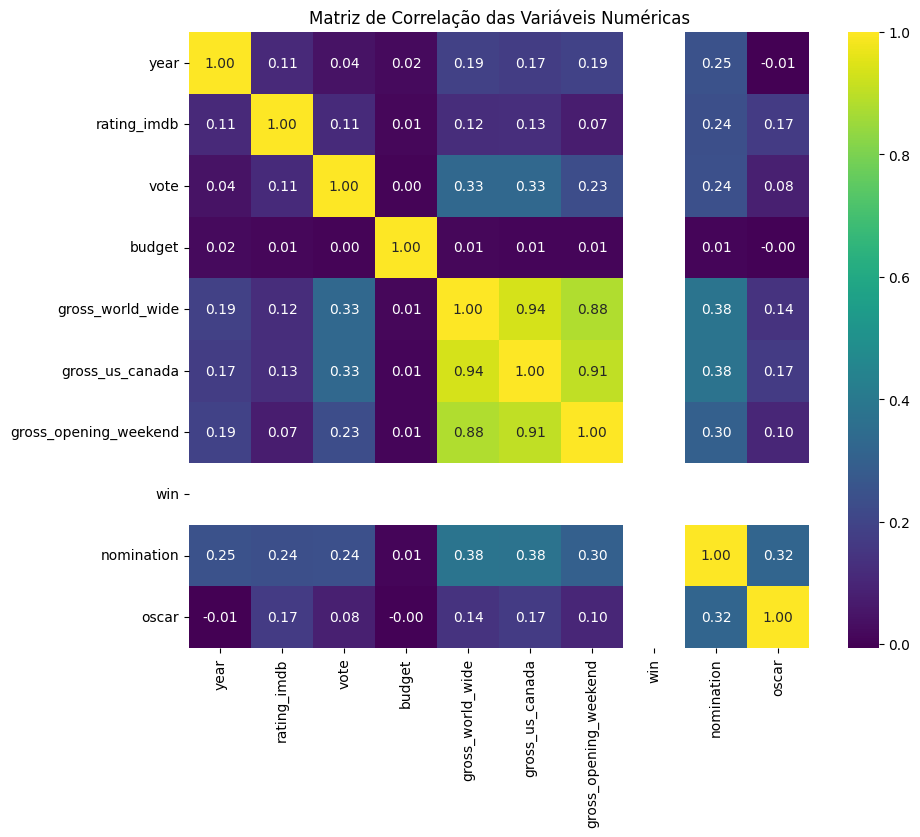

In [229]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Interpretação
**Nesse caso, nós correlacionamos todas as variáveis numéricas do dataset**
 -  A receita global de uma filme afeta significamente a receita dos EUA e a receita na semana de lançamento do filme, haja vista que a maioria dos filmes são **americanos**

## Indentificando outliers na arrecadação mundial por pais

/tmp/ipykernel_30643/2478539151.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_countries = df[df['country_origin'].isin(top_countries).sort_values()]
/tmp/ipykernel_30643/2478539151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='country_origin', y='gross_world_wide', palette='viridis')


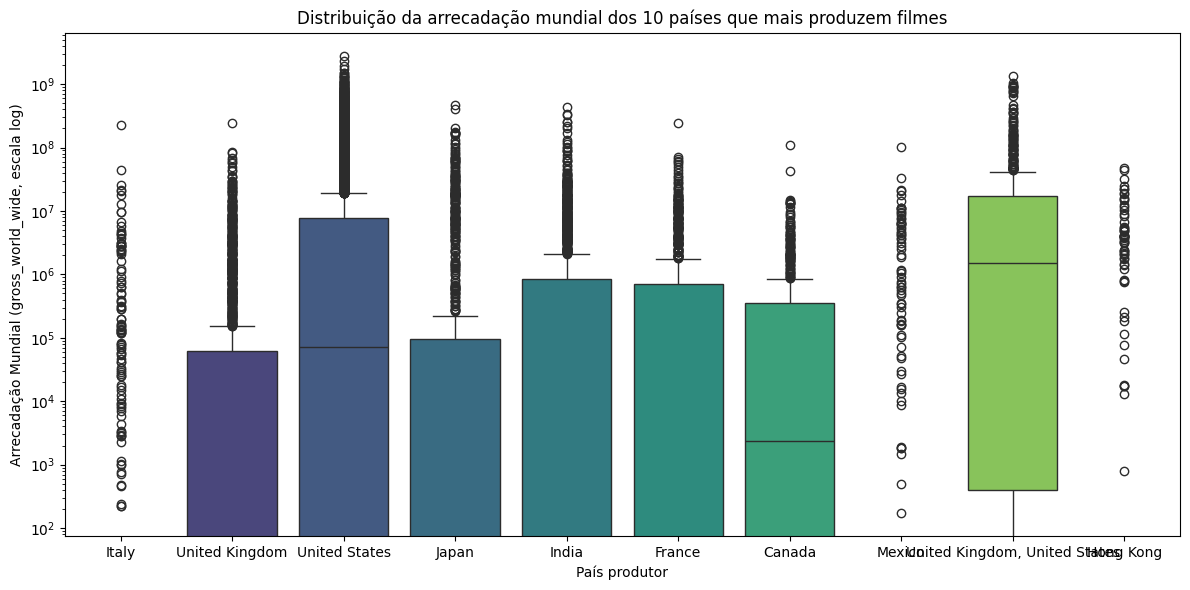

In [246]:
top_countries = df['country_origin'].value_counts().head(10).index.tolist()

df_top_countries = df[df['country_origin'].isin(top_countries).sort_values()]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='country_origin', y='gross_world_wide', palette='viridis')
plt.yscale('log')
plt.xlabel('País produtor')
plt.ylabel('Arrecadação Mundial (gross_world_wide, escala log)')
plt.title('Distribuição da arrecadação mundial dos 10 países que mais produzem filmes')
plt.tight_layout()

## Interpretações
**O boxplot gerado mostra a distribuição da arrecadação mundial (gross_world_wide) dos filmes dos 10 países que mais produzem filmes no dataset**
- **Outlies nos EUA**
    - É possível observar que os EUA têm a maior mediana e também a maior quantidade de outliers, filmes esses que arrecadam muito acima da  média do país. Isso reflete o domínio de Hollywood na indústria global do cinema. Outros países, como Reino Unido, Índia, França e Japão, também apresentam distribuições amplas, mas com medianas e máximos bem menores em comparação aos EUA.